# task1

## Creating dataset DS1.csv

## A dataset containing 50 points, each with two features and a label, is generated here. The label is randomly chosen from the range [-1, 1], and the dataset is saved in CSV format.

In [81]:
import numpy as np
import pandas as pd

X = np.random.rand(50, 2)
y = np.random.choice([-1, 1], 50)

data = np.hstack((X, y.reshape((-1, 1))))
df = pd.DataFrame(data,  columns=['Feature 1', 'Feature 2', 'Label'])
df.to_csv('DS1.csv', index=False, header=False)


## Loading dataset

### First, use the pandas library in Python to load the dataset. The code is as follows:

In [82]:
import pandas as pd

data = pd.read_csv('DS1.csv', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Data preprocessing

### For the SVM algorithm, it is necessary to standardize the data. The StandardScaler in the scikit-learn library can be used for standardization.

### Here, the StandardScaler is used to center and scale the feature data so that the mean of each feature is 0 and the variance is 1.

### The code is as follows:

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


## Splitting dataset to training and testing sets

### The train_test_split function in the scikit-learn library is used to split the dataset into training and testing sets. The code is as follows:

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Model training and prediction

### Use the SVC model in the scikit-learn library for training and prediction.

### Here, a SVM model with a linear kernel function (kernel='linear') is used for training, and the testing set is used for prediction.

### The code is as follows:

In [85]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, gamma='auto').fit(X, y)

y_pred = svm.predict(X_test)


### Use the contourf function to plot the decision boundary and separation region, and use the scatter function to plot the data points.

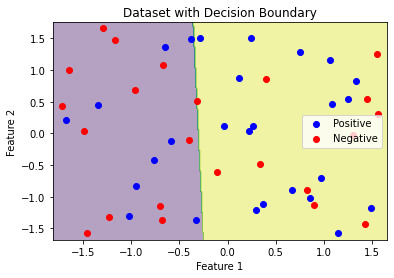

In [86]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Positive')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Negative')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.show()

## Model evaluation

### Here, the confusion matrix and classification report are outputted to evaluate metrics such as accuracy, recall, and F1 score of the model on the testing set.

### The classification_report and confusion_matrix functions in the scikit-learn library are used to evaluate the performance of the model.

### The code is as follows:

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))


Confusion Matrix:
[[4 4]
 [2 5]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.50      0.57         8
         1.0       0.56      0.71      0.63         7

    accuracy                           0.60        15
   macro avg       0.61      0.61      0.60        15
weighted avg       0.61      0.60      0.60        15



## Change C to 0.5

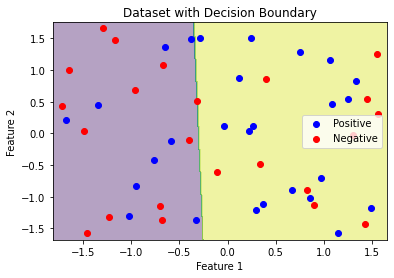

Confusion Matrix:
[[4 4]
 [2 5]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.50      0.57         8
         1.0       0.56      0.71      0.63         7

    accuracy                           0.60        15
   macro avg       0.61      0.61      0.60        15
weighted avg       0.61      0.60      0.60        15



In [88]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


svm = SVC(kernel='linear', C=0.3, gamma='auto').fit(X, y)

y_pred = svm.predict(X_test)


x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Positive')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Negative')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.show()

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

### C is the regularization parameter in SVM, which controls the degree of penalty for misclassified samples. A larger C means a higher penalty for misclassification, and the model will be more fitted to the training data, but it may also lead to overfitting. A smaller C means a lower penalty for misclassification, and the model will focus more on general patterns, but it may cause underfitting.

### In practice, it is usually necessary to experiment repeatedly with specific datasets to select an appropriate C value that achieves optimal model performance. If the C value is too small, the misclassification rate of the model on the training set will increase, which may indicate underfitting. If the C value is too large, overfitting may occur, leading to lower performance on the testing set.

# task2

### Use dataset DS2 and change the kernel function to RBF
### To use the DS2 dataset and change the kernel function to RBF, modify the parameter when creating the SVC object as follows:

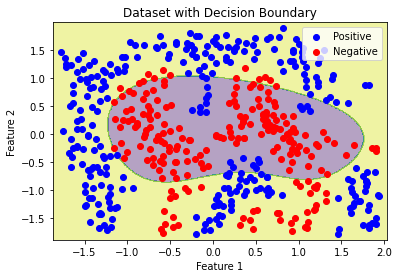

Confusion Matrix:
[[43 13]
 [ 7 87]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.77      0.81        56
           1       0.87      0.93      0.90        94

    accuracy                           0.87       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.87      0.87      0.86       150



In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


data = pd.read_csv('DS2.csv', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


svm = SVC(kernel='rbf', C=0.5, gamma='auto').fit(X, y)

y_pred = svm.predict(X_test)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Positive')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Negative')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.show()

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

### The RBF kernel maps input features to an infinite-dimensional space and is suitable for feature spaces with non-linear forms. The computation speed of the RBF kernel function is relatively slow, but it can handle various types of datasets.

### Among them, the gamma parameter is used to adjust the width of the radial basis function. The larger the gamma, the smaller the effect range of the radial basis function between samples. If gamma is too small, the model may underfit. If gamma is too large, the model may overfit.

### Therefore, in practice, it is necessary to experiment repeatedly with different values of gamma to select an appropriate parameter value that achieves optimal model performance.

# task3

### Using dataset DS3, selecting the RBF kernel function and tuning the parameters C and gamma.

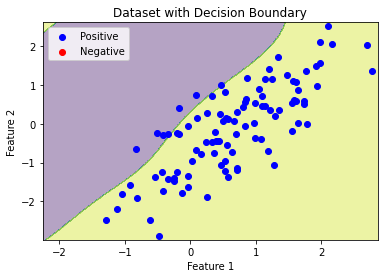

Confusion Matrix:
[[34  1]
 [ 2 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.96      0.92      0.94        25

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('DS3.csv', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svm = SVC(kernel='rbf', C=2, gamma=0.5).fit(X, y)

y_pred = svm.predict(X_test)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Positive')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Negative')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.show()

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

### The RBF kernel function maps input features to an infinite-dimensional space and is suitable for feature spaces with a non-linear form. The RBF kernel function's computation speed is relatively slow but can handle various types of datasets.

### C is the regularization parameter in SVM used to control the penalty degree of error samples. The larger the C value, the higher the penalty degree of misclassification. The model will fit the training data more, but it may also lead to overfitting problems. The smaller the C value, the lower the penalty degree of misclassification. The model will focus on more general patterns, but it may lead to underfitting problems.

### The gamma parameter is used to adjust the width of the radial basis function. The larger the gamma, the smaller the effect range of the radial basis function between samples. If gamma is too small, the model may underfit. If gamma is too large, the model may overfit.